In [220]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

### Elias Image-creator

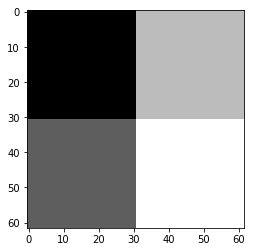

array([  10.,   10.,   10.,   10.,   10.,   10.,   10.,   10.,   10.,
         10.,   10.,   10.,   10.,   10.,   10.,   10.,   10.,   10.,
         10.,   10.,   10.,   10.,   10.,   10.,   10.,   10.,   10.,
         10.,   10.,   10.,   10.,  150.,  150.,  150.,  150.,  150.,
        150.,  150.,  150.,  150.,  150.,  150.,  150.,  150.,  150.,
        150.,  150.,  150.,  150.,  150.,  150.,  150.,  150.,  150.,
        150.,  150.,  150.,  150.,  150.,  150.,  150.,  150.])

In [284]:
M = 60
N = 60
I = np.zeros((M+2, N+2))
I[:N//2+1, :M//2+1] = 10
I[:N//2+1, -(M//2+1):] = 150
I[-(N//2+1):, :M//2+1] = 80
I[-(N//2+1):, -(M//2+1):] = 200
I = I #+ np.random.rand(N+2,M+2)*20
plt.imshow(I, cmap = "gray")
plt.show()
I[8]

In [285]:
g = lambda s: 1/(1+s)

In [286]:
def f(x, alpha):
    first = 5-np.tanh(alpha*(x-1))-np.tanh(alpha*(x-2))
    second = np.tanh(alpha*(x-4)) + np.tanh(alpha*(x-5)) + 0.1*(np.sin(5*x))**2*np.sin(50*x)
    return first+second

In [287]:
np.random.normal()

1.6549875868622037

In [288]:
# M = 20
N = 20000
x = np.linspace(0, 6, M + 2)
h = 6/(M+1)
k = 0.008  #1/(N+1)
alpha = 30
r = k/(2*h**2)

U = np.zeros((N, M+2)) 
# U[0] = f(x, alpha)
U[0] = I[8] + np.random.normal(size = (N+2,M+2))[8]*20
U[:,0] = U[0,0]
U[:,-1] = U[0, -1]

In [289]:
Dx = (np.eye(M+2, M+2, k = -1) + np.eye(M+2, M+2, k = 1))/(2*h)
Dx[0,:] = 0
Dx[-1,:] = 0
Dx.dot(U[0])**2
g(Dx.dot(U[0])**2)

array([  1.00000000e+00,   3.52376440e-05,   6.68264439e-04,
         5.73597060e-04,   4.17967440e-05,   1.11685018e-04,
         2.47392995e-05,   1.33856197e-03,   1.80510886e-04,
         2.28926298e-03,   2.72505995e-05,   1.21536048e-05,
         2.87868994e-04,   2.70287747e-05,   2.45263150e-04,
         9.32115748e-05,   4.72565511e-05,   3.54849625e-04,
         1.03486103e-05,   1.77071553e-05,   5.86459250e-05,
         1.58953400e-05,   9.26737171e-05,   1.14341474e-04,
         3.56110467e-05,   3.53770084e-04,   1.77593671e-01,
         1.63071955e-05,   3.37464866e-05,   6.59737967e-06,
         9.40940805e-07,   8.13394020e-07,   3.31586964e-07,
         4.21274930e-07,   3.46666785e-07,   4.83368242e-07,
         3.96216575e-07,   4.07827559e-07,   4.25127283e-07,
         4.47950573e-07,   3.63496533e-07,   4.20268621e-07,
         4.48188319e-07,   3.55915813e-07,   5.55141272e-07,
         3.62317172e-07,   4.43543544e-07,   4.82576905e-07,
         3.59542365e-07,

In [290]:
A = np.zeros((M, M+2))

for i in range(N-1):
#     if i == 1228:
#         print(U[i])
#         print(Dx)
#         print((Dx.dot(U[i])**2))
#         print((np.eye(M, M+2, k = 1) + np.eye(M, M+2, k = 2)).dot(G))
#         print((np.eye(M, M+2) + 2 * np.eye(M, M+2, k = 1) + np.eye(M, M+2, k = 2)).dot(G))
#         print((np.eye(M, M+2) + np.eye(M, M+2, k = 1)).dot(G))
    G = g(Dx.dot(U[i])**2)
    β = (np.eye(M, M+2, k = 1) + np.eye(M, M+2, k = 2)).dot(G)
    α = (np.eye(M, M+2) + 2 * np.eye(M, M+2, k = 1) + np.eye(M, M+2, k = 2)).dot(G)
    γ = (np.eye(M, M+2) + np.eye(M, M+2, k = 1)).dot(G)
    for j in range(M-1):
        A[j, j:j+3] = [β[j], -α[j], γ[j]]
    U[i+1, 1:-1] = U[i, 1:-1] + r * A.dot(U[i])
    U[i+1, 0] = U[i+1, 1]
    U[i+1, -1] = U[i+1, -2]


In [295]:
np.id(3

AttributeError: module 'numpy' has no attribute 'id'

In [303]:
A = np.zeros((M+2, M+2))
for i in range(N-1):
    G = g(Dx.dot(U[i])**2)
    β = (np.eye(M, M+2, k = 1) + np.eye(M, M+2, k = 2)).dot(G)
    α = (np.eye(M, M+2) + 2 * np.eye(M, M+2, k = 1) + np.eye(M, M+2, k = 2)).dot(G)
    γ = (np.eye(M, M+2) + np.eye(M, M+2, k = 1)).dot(G)
    for j in range(1, M-1):
        A[j, j:j+3] = [β[j], -α[j], γ[j]]
    U[i+1] = np.linalg.solve(np.eye(np.identity(M+2)-r*A, U[i]))

TypeError: only integer scalar arrays can be converted to a scalar index

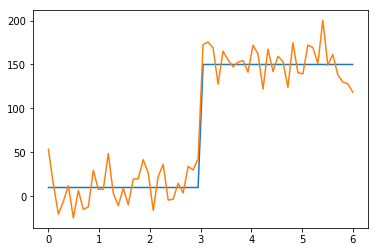

In [304]:
plt.figure()
plt.plot(x, I[8])
plt.plot(x, U[0])
plt.show()

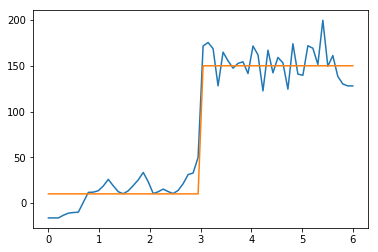

In [305]:
plt.figure()
plt.plot(x, U[-1])
plt.plot(x, I[8])
plt.show()